In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
import torch 
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


## MLP Class

In [12]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, activations):
        super(MLP, self).__init__()
        layers = []
        layer_sizes = [input_size] + hidden_sizes + [output_size]
        for i in range(len(layer_sizes) - 1):
            layers.append(nn.Linear(layer_sizes[i], layer_sizes[i+1]))
            if i < len(activations):
                layers.append(activations[i])
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

## Dataset and model

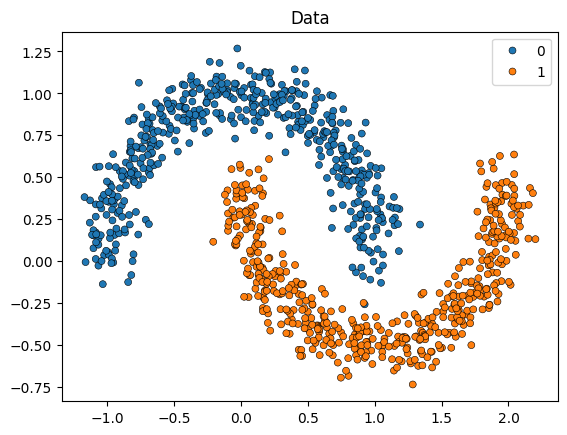

C:\Users\Admin\AppData\Local\Temp\ipykernel_24060\899792172.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.long)


In [23]:

points, labels = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=0)

sns.scatterplot(
    x=points[:, 0], y=points[:, 1], hue=labels, marker="o", s=25, edgecolor="k", legend=True
).set_title("Data")
plt.show()

X = torch.from_numpy(points).to(dtype=torch.float32)
y = torch.from_numpy(labels).to(dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

input_size = X.shape[1]
hidden_sizes = [64, 32]
output_size = 2
activations = [nn.ReLU(), nn.ReLU()]

model = MLP(input_size, hidden_sizes, output_size, activations)

## Dataloader, loss & optimizer

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

## Training loop

Epoch 1, Loss: 0.7530933618545532
Epoch 2, Loss: 0.7539470195770264
Epoch 3, Loss: 0.7329926490783691
Epoch 4, Loss: 0.7733555436134338
Epoch 5, Loss: 0.7221198678016663
Epoch 6, Loss: 0.7639126181602478
Epoch 7, Loss: 0.7119181156158447
Epoch 8, Loss: 0.7301954030990601
Epoch 9, Loss: 0.7911466360092163
Epoch 10, Loss: 0.7107530832290649
Epoch 11, Loss: 0.7442923188209534
Epoch 12, Loss: 0.7757465243339539
Epoch 13, Loss: 0.7329577803611755
Epoch 14, Loss: 0.7165389657020569
Epoch 15, Loss: 0.7274444699287415
Epoch 16, Loss: 0.737231969833374
Epoch 17, Loss: 0.7268118858337402
Epoch 18, Loss: 0.738922119140625
Epoch 19, Loss: 0.7596855759620667
Epoch 20, Loss: 0.7499066591262817
Epoch 21, Loss: 0.7039191722869873
Epoch 22, Loss: 0.7378365397453308
Epoch 23, Loss: 0.7805127501487732
Epoch 24, Loss: 0.7268528938293457
Epoch 25, Loss: 0.7467436194419861
Epoch 26, Loss: 0.7719849348068237
Epoch 27, Loss: 0.746819257736206
Epoch 28, Loss: 0.7365158200263977
Epoch 29, Loss: 0.74441993236541

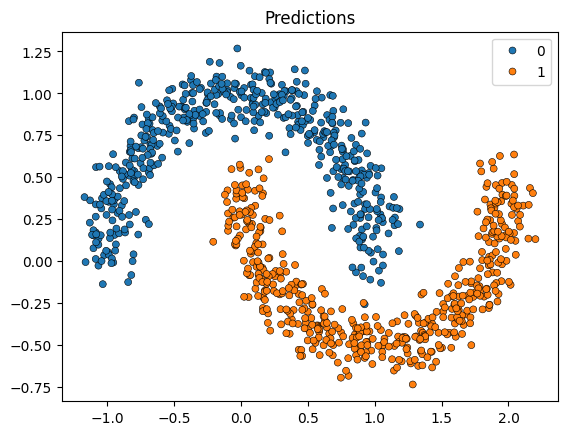

In [25]:

num_epochs = 1000
for epoch in range(num_epochs):
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')


predictions = y.detach().numpy() 
predictions = (predictions > 0.5).astype(int)

sns.scatterplot(
    x=points[:, 0], y=points[:, 1], hue=predictions, marker="o", s=25, edgecolor="k", legend=True
).set_title("Predictions")
plt.show()
